# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(40,95) # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

62

In [11]:
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# data

In [14]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
# 남자
print('\n-----------------------------')
for male in data[1:100:2]:
    print(male, end=' ')

[53, 142] [61, 142] [52, 140] [41, 154] [54, 166] [65, 159] [64, 144] [56, 147] [41, 140] [59, 170] [41, 164] [52, 144] [43, 170] [57, 142] [62, 169] [60, 162] [42, 159] [48, 157] [52, 164] [50, 170] [42, 156] [45, 157] [43, 159] [54, 156] [56, 154] [67, 148] [70, 165] [69, 162] [61, 169] [42, 151] [57, 167] [60, 165] [46, 150] [42, 156] [57, 154] [62, 162] [58, 167] [59, 140] [40, 165] [70, 143] [46, 140] [56, 144] [52, 164] [42, 149] [47, 160] [40, 151] [42, 155] [70, 158] [58, 154] [65, 160] 
-----------------------------
[74, 192] [78, 161] [66, 164] [94, 166] [79, 195] [65, 174] [71, 190] [87, 176] [74, 183] [79, 185] [80, 166] [88, 171] [80, 162] [74, 170] [79, 163] [81, 185] [81, 189] [70, 183] [60, 180] [93, 180] [84, 174] [83, 176] [91, 184] [63, 179] [89, 166] [85, 183] [74, 181] [93, 161] [93, 164] [68, 192] [61, 184] [94, 161] [84, 179] [92, 173] [92, 167] [88, 165] [84, 160] [95, 167] [76, 190] [91, 164] [60, 171] [84, 195] [90, 188] [95, 177] [60, 170] [84, 185] [70, 189]

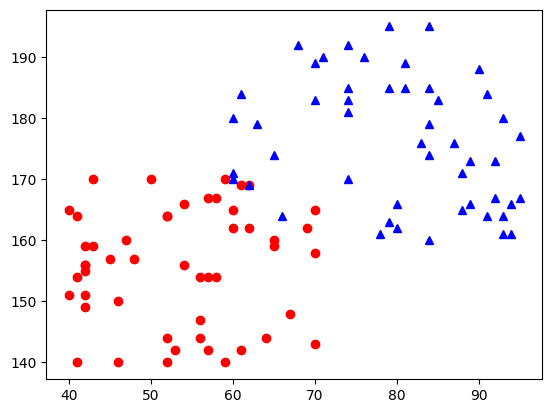

In [17]:
# print('여자 몸무게 :', [d[0] for d in data[::2]])
# print('여자 키 :',     [d[1] for d in data[::2]])
# print('남자 키 :',     [d[0] for d in data[1::2]])
# print('남자 키 :',     [d[1] for d in data[1::2]])
# for d in data[::2]:
#     plt.scatter(d[0], d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],
         [d[1] for d in data[1::2]], '^', color='b')

# 2. 군집화 로직

In [110]:
# 초기 랜덤지점 2개
random_points = [[random.randint(40,95), random.randint(140,195)],
                 [random.randint(40,95), random.randint(140,195)]]
random_points

[[54, 154], [72, 194]]

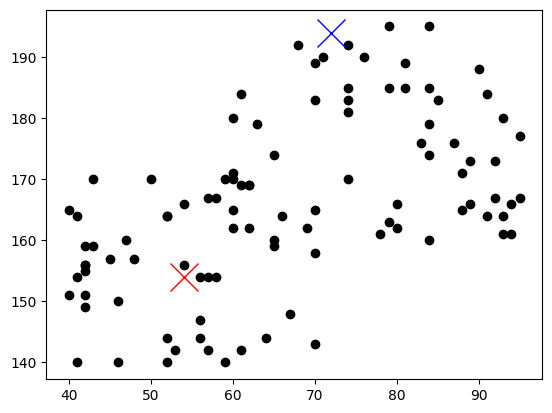

In [111]:
plt.plot([d[0] for d in data],
         [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 2

In [112]:
# 두 점의 거리를 return 
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2)

In [117]:
a= [15,0]; b=[4,3]
dist(a,b)

11.40175425099138

In [118]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역
group1 = [] # random_points[0]이 가까운 그룹
group2 = [] # random_points[1]이 가까운 그룹
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간 X랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(59, 41)

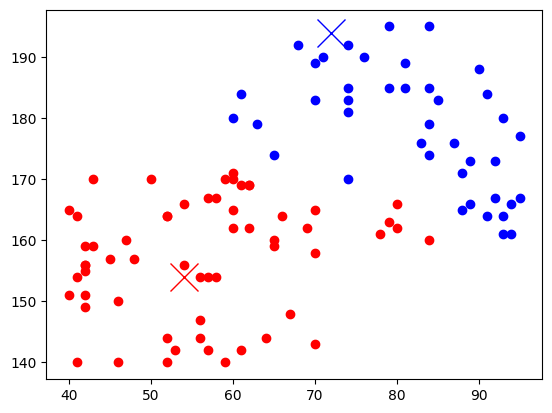

In [123]:
# 새로운 그룹 group1과 group2, 초기랜덤 지점
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 1
plt.show()

In [ ]:
# 기준점 이동 group1의 중심점, group2중심점
sumX=0 ; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[0] = [sumX/len(group1), sumY/len(group1)]
sumX=0 ; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

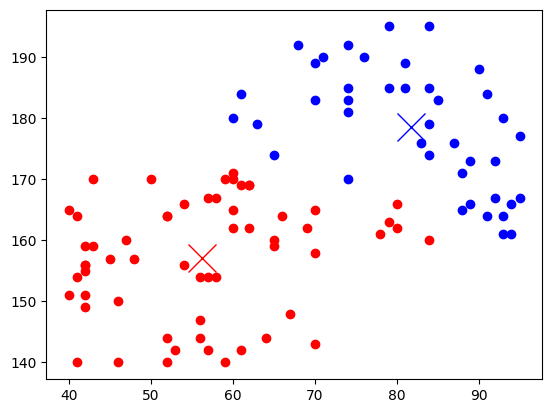

In [125]:
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

# 3. 전체 코드(for문이용)
- data 생성
- 랜덤포인트2지점
- for문
    - 랜덤포인트 2지점기준으로 group1과 group2
    - 랜덤포인트 이용(group1중간점, group2중간점)

초기 points :  [[69, 156], [87, 194]]
1 번째 points :  [[59.82857142857143, 156.78571428571428], [82.23333333333333, 182.96666666666667]]
2 번째 points :  [[57.28333333333333, 154.5], [80.45, 179.85]]
3 번째 points :  [[56.45614035087719, 153.859649122807], [79.93023255813954, 178.93023255813952]]
4 번째 points :  [[56.19642857142857, 153.67857142857142], [79.72727272727273, 178.5909090909091]]
5 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]
6 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]
7 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]
8 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]
9 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]
10 번째 points :  [[56.054545454545455, 153.38181818181818], [79.37777777777778, 178.4]]


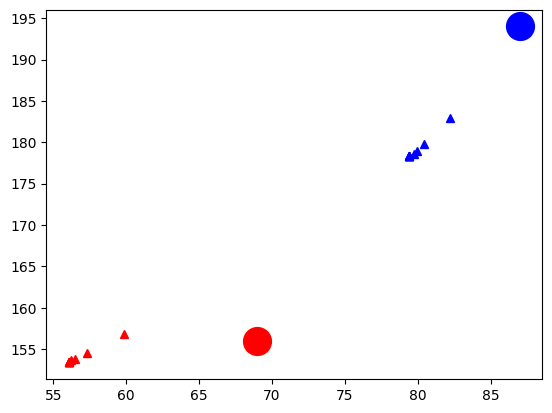

In [138]:
# 데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# point 지정
points = [[random.randint(40,95), random.randint(140,195)],
          [random.randint(40,95), random.randint(140,195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', c='b', markersize=20)
# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11):
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data:
        if dist(d, points[0]) < dist(d,points[1]):
            group1.append(d)
        else:
            group2.append(d)
    # 새로운 포인트 할당
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX = 0; sumY = 0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', c='r')
    plt.plot(points[1][0], points[1][1], '^', c='b')

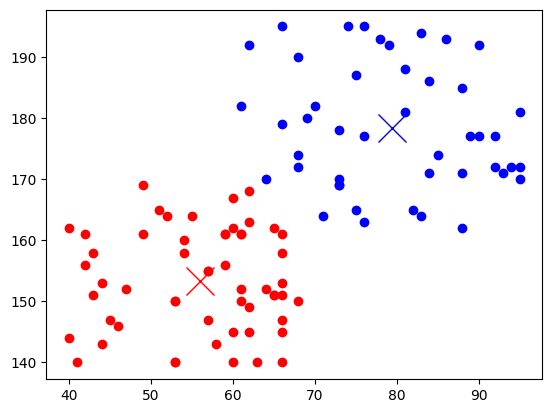

In [139]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)

# 4. api(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측함수
        ; 분류, 회귀, 군집분석
    * 변환함수(전처리함수)
        ; 전처리 ex. 스케일조정
        fit(학습), transform(변환함수)

In [ ]:
# 군집분석 라이브러리가 joblib충돌 경고 메시지 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [144]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 2개 그룹으로 나눠
               init='random', # 초기 중심점 랜덤하게
               n_init=10, # 10번 실행
                random_state=7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [145]:
# 중심점
model.cluster_centers_

array([[ 79.37777778, 178.4       ],
       [ 56.05454545, 153.38181818]])

In [146]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [148]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

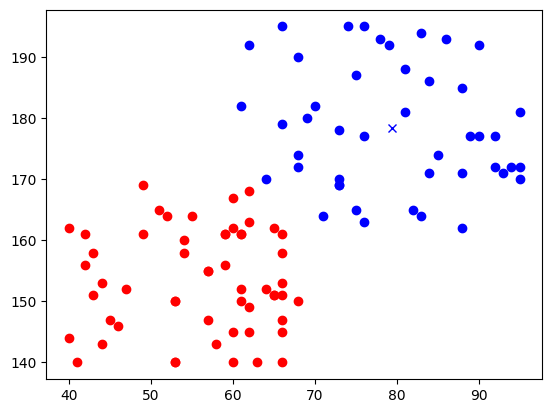

In [150]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(c1[0], c1[1], 'x', color='b')